In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = {}
data['APPLE'] = pd.read_csv('AAPL.csv')
data['AMAZON'] = pd.read_csv('AMZN.csv')
data['MICROSOFT'] = pd.read_csv('MSFT.csv')
data['TESLA'] = pd.read_csv('TSLA.csv')

In [3]:
data['APPLE']

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-01,37.275002,37.555000,37.102501,37.512501,35.403820,141474400
1,2017-08-02,39.820000,39.937500,39.040001,39.285000,37.076691,279747200
2,2017-08-03,39.262501,39.302502,38.755001,38.892502,36.706253,108389200
3,2017-08-04,39.017502,39.349998,38.922501,39.097500,36.899727,82239600
4,2017-08-07,39.264999,39.730000,39.167500,39.702499,37.470718,87481200
...,...,...,...,...,...,...,...
1253,2022-07-25,154.009995,155.039993,152.279999,152.949997,152.484894,53623900
1254,2022-07-26,152.259995,153.089996,150.800003,151.600006,151.138992,55138700
1255,2022-07-27,152.580002,157.330002,152.160004,156.789993,156.313202,78620700
1256,2022-07-28,156.979996,157.639999,154.410004,157.350006,156.871521,81378700


In [4]:
df = {}
df1= {}
for name,prices in data.items():
    df[name] = data[name].reset_index()
for name,prices in df.items():
    df1[name] = df[name]['Close']
final_df = pd.DataFrame(df1)    

In [5]:
final_df=final_df[1000:]
final_df

,APPLE,AMAZON,MICROSOFT,TESLA
1000,146.800003,181.901505,286.140015,216.419998
1001,148.559998,182.832001,289.670013,214.460007
1002,148.990005,184.990997,289.049988,219.206665
1003,146.770004,181.319504,286.540009,214.926666
1004,144.979996,181.516006,286.220001,215.660004
...,...,...,...,...
1253,152.949997,121.139999,258.829987,268.433319
1254,151.600006,114.809998,251.899994,258.859985
1255,156.789993,120.970001,268.739990,274.820007
1256,157.350006,122.279999,276.410004,280.899994


In [6]:
num_portfolio = 100000
daily_return = np.log(final_df.pct_change() + 1).dropna()
# avergae and cov of the daily return
avg_daily_return=np.array(daily_return.mean())
cov_daily_return = daily_return.cov()
results = np.zeros((3 + len(daily_return.columns),num_portfolio))
for i in range(num_portfolio):
    
    weight = np.random.rand(len(daily_return.columns)) #Declaring random weights
    weight = weight/np.sum(weight) #So that sum of all weight will be equal to 1
# Multiplying 252 for annual return and volatility as there are 252 trading days in year
    annual_return = np.sum(weight * avg_daily_return) * 252 #Annual Return
    annual_volatility = np.sqrt(np.dot(weight.T,np.dot(cov_daily_return,weight))) * np.sqrt(252) #Annual Volatility
    
    #Storing the values in results list
    results[0,i] = annual_return
    results[1,i] = annual_volatility
    results[2,i] = results[0,i]/results[1,i]

    for j in range(len(weight)):
        results[j+3,i] =  weight[j]


In [7]:
cols = ['Annual_Return','Annual_Volatility','Sharpe_Ratio']
for num in range(len(list(daily_return.columns))):
    cols.append(list(daily_return.columns)[num])
results_df = pd.DataFrame(results.T,columns=cols)


In [8]:
results_df

,Annual_Return,Annual_Volatility,Sharpe_Ratio,APPLE,AMAZON,MICROSOFT,TESLA
0,-0.047762,0.427050,-0.111841,0.007577,0.545765,0.083712,0.362945
1,0.001062,0.378061,0.002810,0.114666,0.339098,0.245482,0.300754
2,0.074714,0.313269,0.238499,0.529181,0.066236,0.256163,0.148420
3,-0.080717,0.318761,-0.253221,0.229071,0.364208,0.374347,0.032373
4,-0.003075,0.387520,-0.007936,0.142448,0.381041,0.163407,0.313103
...,...,...,...,...,...,...,...
99995,0.054945,0.344298,0.159587,0.284131,0.156199,0.308393,0.251277
99996,-0.090117,0.386356,-0.233247,0.024987,0.541046,0.209731,0.224235
99997,0.058472,0.326385,0.179150,0.365293,0.113336,0.324195,0.197175
99998,-0.092672,0.356274,-0.260116,0.281009,0.519397,0.093087,0.106507


In [9]:
# max sharpe ratio and min volatile portfolios
max_sharpe_ratio = results_df.iloc[results_df['Sharpe_Ratio'].idxmax()]
volatility_lowest = results_df.iloc[results_df['Annual_Volatility'].idxmin()]

In [12]:
print('The Portfolio with maximum Sharpe_Ratio is:')
print(round(max_sharpe_ratio * 100,2))

The Portfolio with maximum Sharpe_Ratio is:
Annual_Return        23.78
Annual_Volatility    48.56
Sharpe_Ratio         48.96
APPLE                32.78
AMAZON                0.14
MICROSOFT             0.92
TESLA                66.16
Name: 39598, dtype: float64


In [11]:
print('The Portfolio with least Volatility is:')
print(round(volatility_lowest * 100,2))

The Portfolio with least Volatility is:
Annual_Return         3.60
Annual_Volatility    28.22
Sharpe_Ratio         12.77
APPLE                49.00
AMAZON                1.22
MICROSOFT            49.76
TESLA                 0.02
Name: 89974, dtype: float64


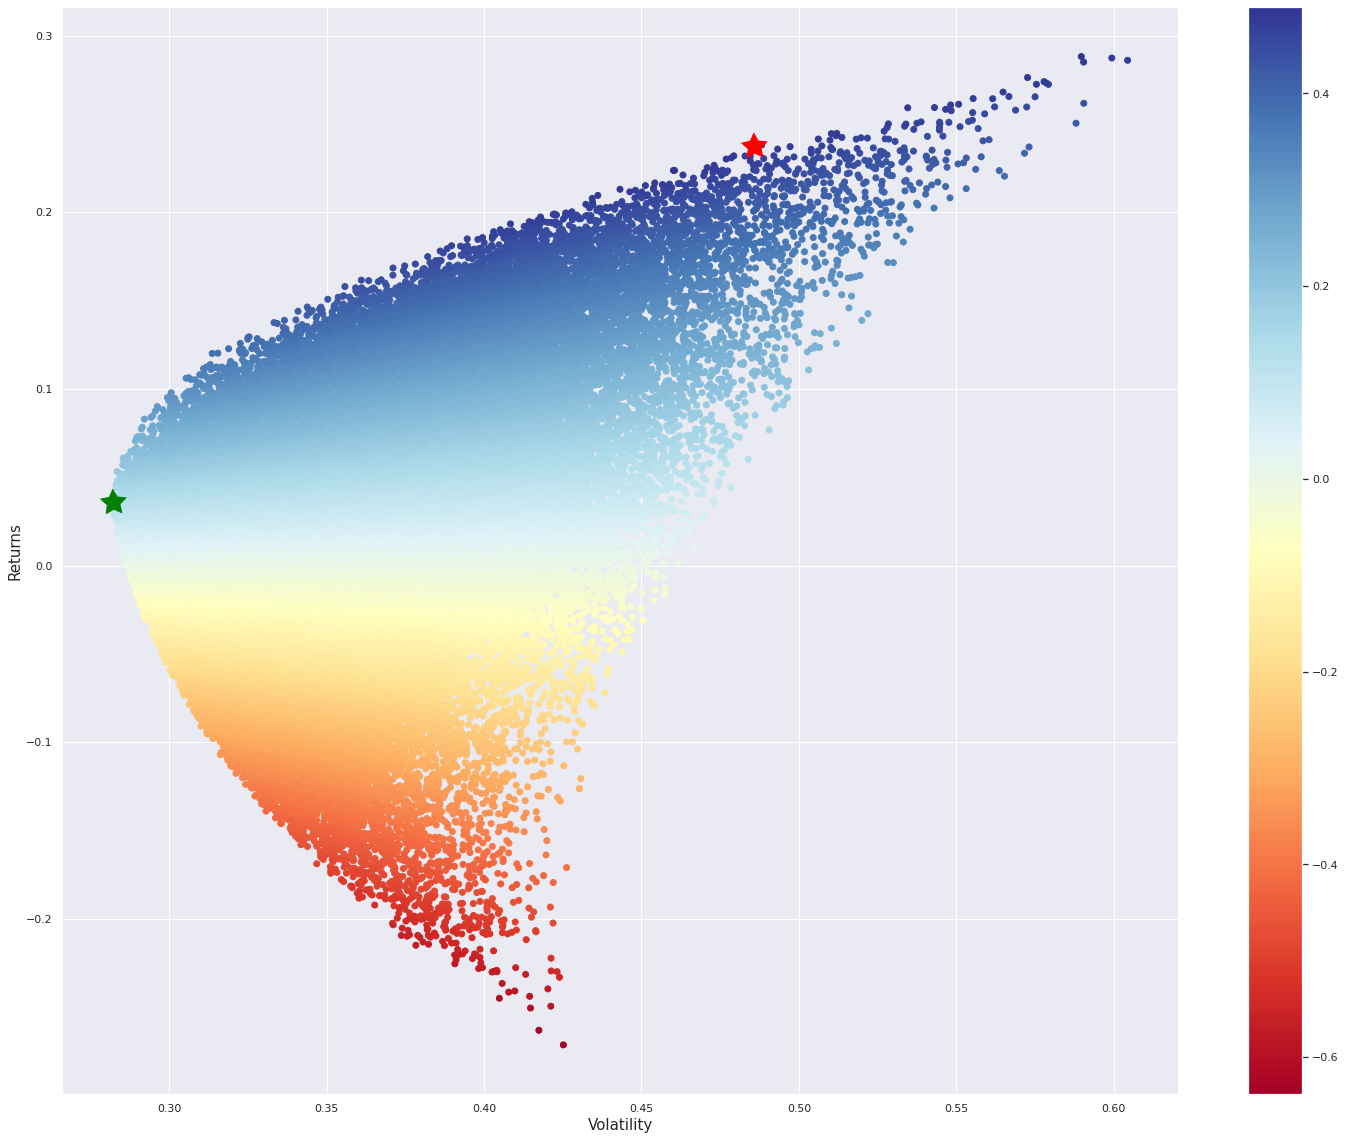

In [13]:
plt.figure(figsize=(25,20))
plt.scatter(results_df['Annual_Volatility'],results_df['Annual_Return'],c =results_df['Sharpe_Ratio'],cmap='RdYlBu')
plt.colorbar()

plt.scatter(max_sharpe_ratio[1],max_sharpe_ratio[0],marker = (5,1,3),color='red',s=700) #Red - Portfolio 1
plt.scatter(volatility_lowest[1],volatility_lowest[0],marker = (5,1,3),color='green',s=700)#Green - Portfolio 2
            

plt.xlabel('Volatility',fontsize = 15)
plt.ylabel('Returns',fontsize = 15)
plt.show()